<a href="https://colab.research.google.com/github/NikolayLomo/Nikolay/blob/master/Copy_of_Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Урок №10 Листинг 2.4 Сумма натуральных чисел и оператор цикла
print("Сумма натуральных чисел")
n=100 # Количество слагаемых
# Формируем текст для отображения результата
text="1+2+...+"+str(n)+" ="
# Интерационная переменная для оператора цикла 
i=1
# Переменная для записи суммы
s=0
#Оператор цикла для вычисления суммы
while i<=n:
  #Добавляем слагаемое к сумме
  s=s+1
  # Изменяем итерационную переменную
  i=i+1
  #Отображаем результат
print(text, s)


Сумма натуральных чисел
1+2+...+100 = 100


In [ ]:
import numpy as np
import pandas as ps
import math as math

In [ ]:
def CRRTree(K,T,S,sig,r,N,PorC):
    
    dt=T/N;
    dxu=math.exp(sig*math.sqrt(dt));
    dxd=math.exp(-sig*math.sqrt(dt));
    pu=((math.exp(r*dt))-dxd)/(dxu-dxd);
    pd=1-pu;
    disc=math.exp(-r*dt);

    St = [0] * (N+1)
    C = [0] * (N+1)
    
    St[0]=S*dxd**N;
    
    for j in range(1, N+1): 
        St[j] = St[j-1] * dxu/dxd;
    
    for j in range(1, N+1):
        if PorC == 'p':
            C[j] = max(K-St[j],0);
        elif PorC == 'c':
            C[j] = max(St[j]-K,0);
    
    for i in range(N, 0, -1):
        for j in range(0, i):
            C[j] = disc*(pu*C[j+1]+pd*C[j]);
            
    return C[0]

In [ ]:
prices = [data.Close]

price = CRRTree(10,2.5,10,0.3,0.02,1000,'p')
print('Cox-Ross-Rubinstein put price', price)

price = CRRTree(10,2.5,10,0.3,0.02,1000,'c')
print('Cox-Ross-Rubinstein call price', price)

Cox-Ross-Rubinstein put price 1.594688964453778
Cox-Ross-Rubinstein call price 2.0823947194469103


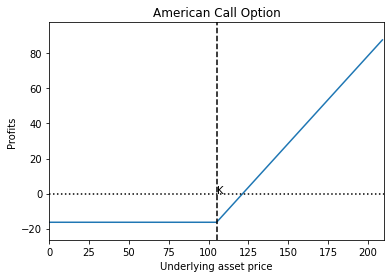

American Call Price:  16.360121026952864


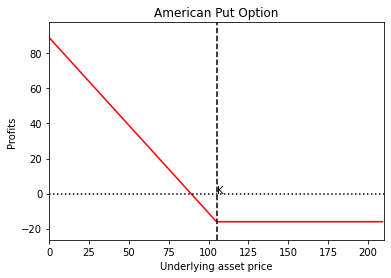

American Put Price: 16.073923603566605


In [ ]:
# Author: Victor Lopez Lopez,
# Group Members: Shedrack Lutembeka, Bo Yuan, Victor Lopez Lopez
# Binomial tree (Cox-Rox-Rubenstein) for American Option Valuation 

# Inspired on: 
# Binomial Tree for America and European options by Mehdi Bounouar
# Binomial Tree Option Valuation Cox, Ross, Rubinstein method by "www.quantandfinancial.com"
import matplotlib.pyplot as plt



def Binomial(n, S, K, r, v, t, PutCall):  
    At = t/n 
    u = np.exp(v*np.sqrt(At))
    d = 1./u
    p = (np.exp(r*At)-d) / (u-d) 

    #Binomial price tree
    stockvalue = np.zeros((n+1,n+1))
    stockvalue[0,0] = S
    for i in range(1,n+1):
        stockvalue[i,0] = stockvalue[i-1,0]*u
        for j in range(1,i+1):
            stockvalue[i,j] = stockvalue[i-1,j-1]*d
    
    #option value at final node   
    optionvalue = np.zeros((n+1,n+1))
    for j in range(n+1):
        if PutCall=="C": # Call
            optionvalue[n,j] = max(0, stockvalue[n,j]-K)
        elif PutCall=="P": #Put
            optionvalue[n,j] = max(0, K-stockvalue[n,j])
    
    #backward calculation for option price    
    for i in range(n-1,-1,-1):
        for j in range(i+1):
                if PutCall=="P":
                    optionvalue[i,j] = max(0, K-stockvalue[i,j], np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
                elif PutCall=="C":
                    optionvalue[i,j] = max(0, stockvalue[i,j]-K, np.exp(-r*At)*(p*optionvalue[i+1,j]+(1-p)*optionvalue[i+1,j+1]))
    return optionvalue[0,0]

    # Inputs
n = 100 #input("Enter number of binomial steps: ")           #number of steps
S = 100 #input("Enter the initial underlying asset price: ") #initial underlying asset price
r = 0.06 #input("Enter the risk-free interest rate: ")        #risk-free interest rate
K = 105 #input("Enter the option strike price: ")            #strike price
v = 0.4 #input("Enter the volatility factor: ")              #volatility
t = 1.

    #Graphs and results for the Option prices

y = [-Binomial(n, S, K, r, v, t, "C")] * (K)
y += [x - Binomial(n, S, K, r, v, t, "C") for x in range(K)] 

plt.plot(range(2*K), y)
plt.axis([0, 2*K, min(y) - 10, max(y) + 10])
plt.xlabel('Underlying asset price')
plt.ylabel('Profits')
plt.axvline(x=K, linestyle='--', color='black')
plt.axhline(y=0, linestyle=':', color='black')
plt.title('American Call Option')
plt.text(105, 0, 'K')
plt.show()

print("American Call Price: ", (Binomial(n, S, K, r, v, t, PutCall="C")))

z = [-x + K - Binomial(n, S, K, r, v, t, "P") for x in range(K)] 
z += [-Binomial(n, S, K, r, v, t, "P")] * (K)

plt.plot(range(2*K), z, color='red')
plt.axis([0, 2*K, min(y) - 10, max(y) + 10])
plt.xlabel('Underlying asset price')
plt.ylabel('Profits')
plt.axvline(x=K, linestyle='--', color='black')
plt.axhline(y=0, linestyle=':', color='black')
plt.title('American Put Option')
plt.text(105, 0, 'K')
plt.show()

print("American Put Price:", (Binomial(n, S, K, r, v, t, PutCall="P")))
    
Width: 1366

In [ ]:
data = ps.read_csv("test-siu0.csv", sep=';')

data.head()

NameError: ignored

In [ ]:
import pandas
pandas.__version__

'0.25.3'

In [ ]:
# namespace Listing_2._6_Вычисление_площади_фигуры_оператором_цикла
# Количество равных интервалов, на которые делятся стороны единичного квадрата
n = 500
# "Цена деления" - расстояние между соседними точками
dz = 1/n;
# Количество точек, которые попадают внутрь области
pts = 0
# Начальное значение индекса, определяющего столбец точек
i = 1
# Внешний оператор цикла. Перебираем стобцы точек
while i <= n:
    # x - координата точки
    x = dz * i
    # Начальное значение второго индекса для точек столбца
    j = 0
    # Внутренний оператор цикла. Перебираем точки в одном столбце
    while j<= n:
    # y - координата точки
    у = dz*j
    # Условный опреатор: проверяем попала ли точка внутрь области
    if y <= x and y >=x**2:
        # Еще одна точка внутри области
        pts = pts + 1
    # Значения второго индекса увеличиваем на единицу
    j = j + 1
    # Значение первого индекса увеличиваем на единицу
    i = i + 1
# Вычисляем площадь фигуры
s = pts / (n + 1) ** 2
# Отображаем результат
print("Площадь фигуры", s)

IndentationError: ignored

In [ ]:
# Урок №10 Листинг 2.4 Сумма натуральных чисел и оператор цикла
print("Сумма натуральных чисел")
n=100 # Количество слагаемых
# Формируем текст для отображения результата
text="1+2+...+"+str(n)+" ="
# Интерационная переменная для оператора цикла 
i=1
# Переменная для записи суммы
s=0
#Оператор цикла для вычисления суммы
while i<=n:
  #Добавляем слагаемое к сумме
  s=s+1
  # Изменяем итерационную переменную
  i=i+1
  #Отображаем результат
print(text, s)


Занятие 2 от 05 февраля 2021 (пт)


In [ ]:
x="Hello, world"
print(x)           

Hello, world


Предсказание цены на недвижимость с CNN # New Section